In [15]:
import tensorflow as tf
import keras
import numpy as np

from keras.datasets import mnist
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
(train_img , train_labels) , (test_img , test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
train_labels = keras.utils.to_categorical(train_labels.astype('int32'), 10)
test_labels = keras.utils.to_categorical(test_labels.astype('int32'), 10)

In [4]:
train_img = train_img.reshape(train_img.shape[0],28,28,1)
test_img = test_img.reshape(test_img.shape[0],28,28,1)
print(train_img.shape)
#정수형 이미지 데이터를 float 형 변환
train_img = train_img.astype('float32')
test_img = test_img.astype('float32')

#학습을 위해서 0 ~ 255 - > 0 ~ 1.0 범위로 지정 255로 나눈다
train_img = train_img / 255
test_img = test_img / 255
test_img.shape

(60000, 28, 28, 1)


(10000, 28, 28, 1)

In [5]:
train_img = np.transpose(train_img, [0,3,1,2])
test_img = np.transpose(test_img, [0,3,1,2])

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D , Dense, Flatten , Activation
# CNN 모형 만들기
# data_format은 컨볼루젼이랑 맥스풀링이랑 맞춰줘야함

model_cnn = Sequential()
# layer 0
model_cnn.add(Conv2D(
    5,
    kernel_size=(4,4),
    strides=(1, 1),
    padding='valid',
    data_format='channels_first',
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='ones', # zeros -> ones
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    name='conv1'))
# layer 1
model_cnn.add(MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding='same',
    data_format='channels_first',
    name='maxpool1'))
#layer 2
model_cnn.add(Activation('tanh')) # 컨볼루젼에서는 탄젠트 많이쓰임

# layer3
model_cnn.add(Conv2D(
    3,
    kernel_size=(3,3),
    strides=(1, 1),
    padding='valid',
    data_format='channels_first',
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='ones', # zeros -> ones
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    name='conv2'))
# layer 4
model_cnn.add(MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding='same',
    data_format='channels_first',
    name='maxpool2'))
#layer 5
model_cnn.add(Activation('tanh'))

# layer6
model_cnn.add(Conv2D(
    3,
    kernel_size=(4,4),
    strides=(1, 1),
    padding='valid',
    data_format='channels_first',
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='ones', # zeros -> ones
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    name='conv3'
))
# layer 7
model_cnn.add(Activation('tanh')) # 컨볼루젼 끝내기

# layer 8
model_cnn.add(Flatten(data_format=None , name = 'flat1'))
# layer 9 
model_cnn.add(Dense(10, use_bias=True,bias_initializer='ones', name = 'dense1' ))
# layer 10
model_cnn.add(Activation('softmax'))


In [7]:
model_cnn.compile(tf.keras.optimizers.Adam() , 'categorical_crossentropy' , ['acc'])

In [8]:
hist = model_cnn.fit(train_img , train_labels , epochs=500 , batch_size=64 , validation_data = (test_img,test_labels))

Epoch 1/500
938/938 [==============================] - 17s 6ms/step - loss: 1.2066 - acc: 0.6089 - val_loss: 0.4502 - val_acc: 0.8768
Epoch 2/500
938/938 [==============================] - 5s 5ms/step - loss: 0.3758 - acc: 0.8923 - val_loss: 0.2865 - val_acc: 0.9216
Epoch 3/500
938/938 [==============================] - 4s 5ms/step - loss: 0.2758 - acc: 0.9195 - val_loss: 0.2234 - val_acc: 0.9350
Epoch 4/500
938/938 [==============================] - 5s 6ms/step - loss: 0.2300 - acc: 0.9314 - val_loss: 0.1933 - val_acc: 0.9450
Epoch 5/500
938/938 [==============================] - 5s 5ms/step - loss: 0.2031 - acc: 0.9397 - val_loss: 0.1753 - val_acc: 0.9488
Epoch 6/500
938/938 [==============================] - 5s 5ms/step - loss: 0.1852 - acc: 0.9450 - val_loss: 0.1591 - val_acc: 0.9526
Epoch 7/500
938/938 [==============================] - 5s 5ms/step - loss: 0.1721 - acc: 0.9484 - val_loss: 0.1529 - val_acc: 0.9536
Epoch 8/500
938/938 [==============================] - 5s 5ms/step -

In [9]:
score = model_cnn.evaluate(test_img , test_labels , verbose = 1)
print('정답률=', score[1], 'loss=',score[0])

313/313 [==============================] - 1s 4ms/step - loss: 0.0728 - acc: 0.9779
정답률= 0.9779000282287598 loss= 0.07277760654687881


In [12]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

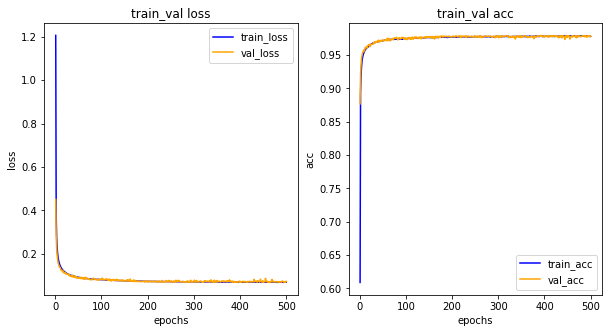

In [16]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color='orange' , label = 'val_loss')
ax1.set_title('train_val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = hist.history['acc']
val_acc = hist.history['val_acc']

ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label = 'train_acc')
ax1.plot(epochs, val_acc, color='orange' , label = 'val_acc')
ax1.set_title('train_val acc')
ax1.set_xlabel('epochs')
ax1.set_ylabel('acc')
ax1.legend()